## Merging DataFrames

In [178]:
import pandas as pd
weather = pd.read_csv('book_code/ch_04/data/nyc_weather_2018.csv', parse_dates=['date'])
weather.head()

,attributes,datatype,date,station,value
0,",,N,",PRCP,2018-01-01,GHCND:US1CTFR0039,0.00
1,",,N,",PRCP,2018-01-01,GHCND:US1NJBG0015,0.00
2,",,N,",SNOW,2018-01-01,GHCND:US1NJBG0015,0.00
3,",,N,",PRCP,2018-01-01,GHCND:US1NJBG0017,0.00
4,",,N,",SNOW,2018-01-01,GHCND:US1NJBG0017,0.00


In [179]:
snow_data = weather.query('datatype == "SNOW" and value > 0')
snow_data.head()

,attributes,datatype,date,station,value
124,",,N,",SNOW,2018-01-01,GHCND:US1NYWC0019,25.00
723,",,N,",SNOW,2018-01-04,GHCND:US1NJBG0015,229.00
726,",,N,",SNOW,2018-01-04,GHCND:US1NJBG0017,10.00
730,",,N,",SNOW,2018-01-04,GHCND:US1NJBG0018,46.00
737,",,N,",SNOW,2018-01-04,GHCND:US1NJES0018,10.00


In [180]:
station_info = pd.read_csv('book_code/ch_04/data/weather_stations.csv')
station_info.head()

,id,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.06,-73.58,36.60
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.04,-73.57,6.40
2,GHCND:US1NJBG0001,"BERGENFIELD 0.3 SW, NJ US",40.92,-74.00,20.10
3,GHCND:US1NJBG0002,"SADDLE BROOK TWP 0.6 E, NJ US",40.90,-74.08,16.80
4,GHCND:US1NJBG0003,"TENAFLY 1.3 W, NJ US",40.91,-73.98,21.60


In [181]:
print(station_info.id.describe())
print(weather.station.describe())

count                   262
unique                  262
top       GHCND:US1CTFR0022
freq                      1
Name: id, dtype: object
count                 80256
unique                  109
top       GHCND:USW00094789
freq                   4270
Name: station, dtype: object


In [182]:
def get_row_count(*dfs):
    """
    Gets the row count of any number of DataFrames.
    :param dfs: DataFrame(s) of interest
    :return: List of row counts for the DataFrame(s)
    """
    return [df.shape[0] for df in dfs]

get_row_count(station_info, weather)

[262, 80256]

In [183]:
def get_info(attr, *dfs):
    """
    Get a specific attribute of any number of DataFrames.
    :param attr: DataFrame attribute of interest.
    :param dfs: DataFrame(s) of interest.
    :return: List of attribute outputs from each DataFrame
    """
    return list(map(lambda x: getattr(x, attr), dfs))

get_info('shape', station_info, weather)

[(262, 5), (80256, 5)]

In [184]:
inner_join = weather.merge(station_info, left_on='station', right_on='id')
inner_join.sample(5, random_state=0)

,attributes,datatype,date,station,value,id,name,latitude,longitude,elevation
27422,",,N,",PRCP,2018-01-23,GHCND:US1NYSF0061,2.30,GHCND:US1NYSF0061,"CENTERPORT 0.9 SW, NY US",40.89,-73.38,53.60
19317,"T,,N,",PRCP,2018-08-10,GHCND:US1NJUN0014,0.00,GHCND:US1NJUN0014,"WESTFIELD 0.6 NE, NJ US",40.66,-74.34,36.30
13778,",,N,",WESF,2018-02-18,GHCND:US1NJMS0089,19.60,GHCND:US1NJMS0089,"PARSIPPANY TROY HILLS TWP 1.3, NJ US",40.87,-74.41,103.60
39633,",,7,0700",PRCP,2018-04-06,GHCND:USC00301309,0.00,GHCND:USC00301309,"CENTERPORT, NY US",40.88,-73.37,9.10
51025,",,W,2400",SNWD,2018-12-14,GHCND:USW00014734,0.00,GHCND:USW00014734,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",40.68,-74.17,2.10


In [185]:
inner_join = weather.merge(station_info.rename(dict(id='station'),axis=1), on='station')
inner_join.sample(5, random_state=0)

,attributes,datatype,date,station,value,name,latitude,longitude,elevation
27422,",,N,",PRCP,2018-01-23,GHCND:US1NYSF0061,2.30,"CENTERPORT 0.9 SW, NY US",40.89,-73.38,53.60
19317,"T,,N,",PRCP,2018-08-10,GHCND:US1NJUN0014,0.00,"WESTFIELD 0.6 NE, NJ US",40.66,-74.34,36.30
13778,",,N,",WESF,2018-02-18,GHCND:US1NJMS0089,19.60,"PARSIPPANY TROY HILLS TWP 1.3, NJ US",40.87,-74.41,103.60
39633,",,7,0700",PRCP,2018-04-06,GHCND:USC00301309,0.00,"CENTERPORT, NY US",40.88,-73.37,9.10
51025,",,W,2400",SNWD,2018-12-14,GHCND:USW00014734,0.00,"NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US",40.68,-74.17,2.10


In [186]:
left_join = station_info.merge(weather, left_on='id', right_on='station', how='left')
right_join = weather.merge(station_info, left_on='station', right_on='id', how='right')
right_join.tail()

,attributes,datatype,date,station,value,id,name,latitude,longitude,elevation
80404,",,W,",WDF5,2018-12-31,GHCND:USW00094789,130.00,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.64,-73.76,3.40
80405,",,W,",WSF2,2018-12-31,GHCND:USW00094789,9.80,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.64,-73.76,3.40
80406,",,W,",WSF5,2018-12-31,GHCND:USW00094789,12.50,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.64,-73.76,3.40
80407,",,W,",WT01,2018-12-31,GHCND:USW00094789,1.00,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.64,-73.76,3.40
80408,",,W,",WT02,2018-12-31,GHCND:USW00094789,1.00,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.64,-73.76,3.40


In [187]:
get_info('shape', inner_join, left_join, right_join)

[(80256, 9), (80409, 10), (80409, 10)]

In [188]:
outer_join = weather.merge(station_info[station_info.name.str.contains('NY')], left_on='station', right_on='id', how='outer', indicator=True)
outer_join.sample(4, random_state=0).append(outer_join[outer_join.station.isna()].head(2))

/var/folders/rk/qwqd81bx00b1rl2fj8gy_vnc0000gn/T/ipykernel_14170/1341329320.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outer_join.sample(4, random_state=0).append(outer_join[outer_join.station.isna()].head(2))


,attributes,datatype,date,station,value,id,name,latitude,longitude,elevation,_merge
17259,",,N,",PRCP,2018-05-15,GHCND:US1NJPS0022,0.30,NaN,NaN,NaN,NaN,NaN,left_only
76178,",,N,",PRCP,2018-05-19,GHCND:US1NJPS0015,8.10,NaN,NaN,NaN,NaN,NaN,left_only
73410,",,N,",MDPR,2018-08-05,GHCND:US1NYNS0018,12.20,GHCND:US1NYNS0018,"HICKSVILLE 1.3 ENE, NY US",40.77,-73.50,45.70,both
74822,",,N,",SNOW,2018-04-02,GHCND:US1NJMS0016,178.00,NaN,NaN,NaN,NaN,NaN,left_only
80256,NaN,NaN,NaT,NaN,NaN,GHCND:US1NJMS0036,"PARSIPPANY TROY HILLS TWP 2.1, NJ US",40.87,-74.39,64.30,right_only
80257,NaN,NaN,NaT,NaN,NaN,GHCND:US1NJMS0039,"PARSIPPANY TROY HILLS TWP 1.3, NJ US",40.85,-74.45,94.20,right_only


More examples TBD...

## DataFrame operations
### Arithmetic and statistics

In [189]:
import numpy as np
fb = pd.read_csv('book_code/ch_04/data/fb_2018.csv', index_col='date', parse_dates=True)

In [190]:
fb.assign(abs_z_score_volume=lambda x: x.volume.sub(x.volume.mean()).div(x.volume.std()).abs()).query('abs_z_score_volume > 3')

,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.15
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.32
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.11
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.12
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.39


In [191]:
fb.assign(volume_pct_change=fb.volume.pct_change(), pct_change_rank=lambda x: x.volume_pct_change.abs().rank(ascending=False)).nsmallest(5, 'pct_change_rank')

,open,high,low,close,volume,volume_pct_change,pct_change_rank
date,,,,,,,
2018-01-12,178.06,181.48,177.40,179.37,77551299,7.09,1.00
2018-03-19,177.01,177.17,170.06,172.56,88140060,2.61,2.00
2018-07-26,174.89,180.13,173.75,176.26,169803668,1.63,3.00
2018-09-21,166.64,167.25,162.81,162.93,45994800,1.43,4.00
2018-03-26,160.82,161.10,149.02,160.06,126116634,1.35,5.00


In [192]:
fb['2018-01-11':'2018-01-12']

,open,high,low,close,volume
date,,,,,
2018-01-11,188.40,188.40,187.38,187.77,9588587
2018-01-12,178.06,181.48,177.40,179.37,77551299


In [193]:
(fb > 215).any()
# FB's low price never went above $215

open       True
high       True
low       False
close      True
volume     True
dtype: bool

In [194]:
(fb > 215).all()

open      False
high      False
low       False
close     False
volume     True
dtype: bool

### Binning and thresholds

In [195]:
# Do any days have the same volume? That is, do any two or more days have the same volume?
(fb.volume.value_counts() > 1).sum()

0

In [196]:
volume_binned = pd.cut(fb.volume, bins=3, labels=['low', 'med', 'high'])
volume_binned.value_counts()

low     240
med       8
high      3
Name: volume, dtype: int64

In [197]:
fb[volume_binned=='high'].sort_values('volume', ascending=False)

,open,high,low,close,volume
date,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668
2018-03-20,167.47,170.20,161.95,168.15,129851768
2018-03-26,160.82,161.10,149.02,160.06,126116634


In [198]:
fb['2018-07-25':'2018-07-26']

,open,high,low,close,volume
date,,,,,
2018-07-25,215.72,218.62,214.27,217.50,64592585
2018-07-26,174.89,180.13,173.75,176.26,169803668


In [199]:
fb['2018-03-16':'2018-03-20']

,open,high,low,close,volume
date,,,,,
2018-03-16,184.49,185.33,183.41,185.09,24403438
2018-03-19,177.01,177.17,170.06,172.56,88140060
2018-03-20,167.47,170.20,161.95,168.15,129851768


In [200]:
import matplotlib.pyplot as plt

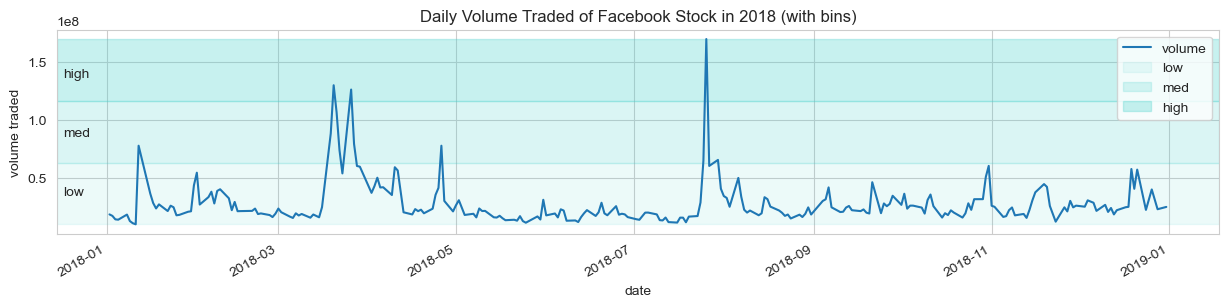

In [201]:
fb.plot(y='volume', figsize=(15, 3), title='Daily Volume Traded of Facebook Stock in 2018 (with bins)')

for bin_name, alpha, bounds in zip(['low', 'med', 'high'], [0.1, 0.2, 0.3], pd.cut(fb.volume, bins=3).unique().categories.values):
    plt.axhspan(bounds.left, bounds.right, alpha=alpha, label=bin_name, color='mediumturquoise')
    plt.annotate(bin_name, xy=('2017-12-17', (bounds.left + bounds.right)/2.1))

plt.ylabel('volume traded')
plt.legend()
plt.show()

In [202]:
volume_qbinned = pd.qcut(fb.volume, q=4, labels=['q1', 'q2', 'q3', 'q4'])
volume_qbinned.value_counts()

q1    63
q2    63
q4    63
q3    62
Name: volume, dtype: int64

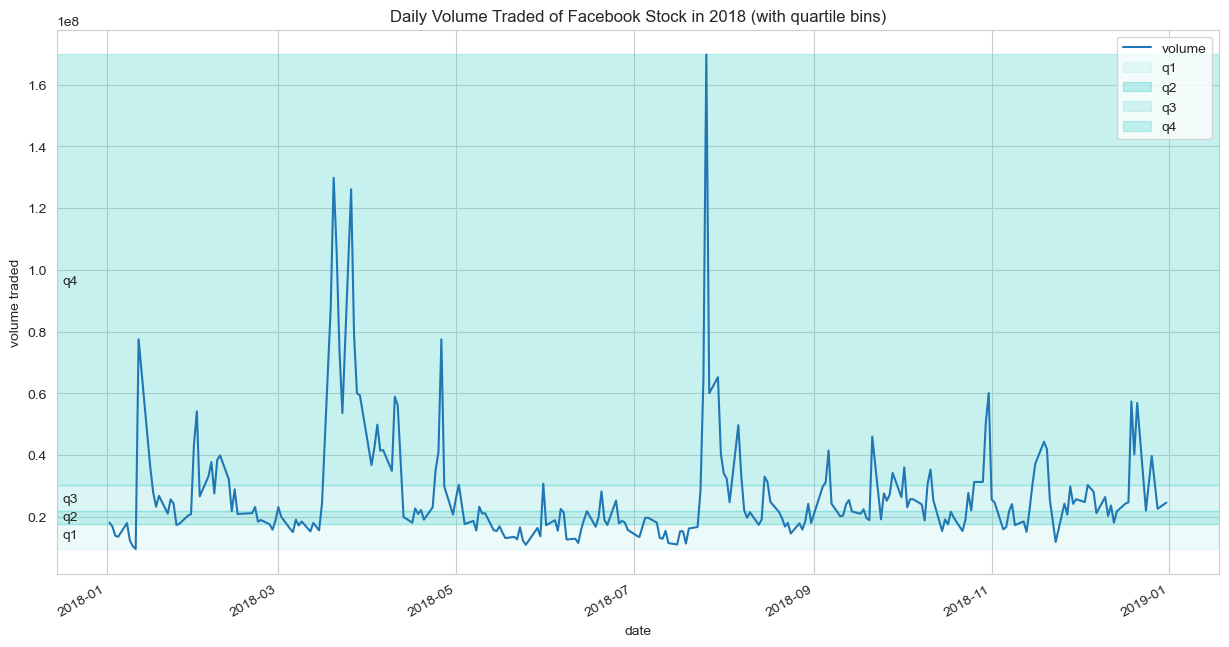

In [203]:
fb.plot(y='volume', figsize=(15, 8), title='Daily Volume Traded of Facebook Stock in 2018 (with quartile bins)')

for bin_name, alpha, bounds in zip(
        ['q1', 'q2', 'q3', 'q4'], [0.1, 0.35, 0.2, 0.3], pd.qcut(fb.volume, q=4).unique().categories.values
):
    plt.axhspan(bounds.left, bounds.right, alpha=alpha, label=bin_name, color='mediumturquoise')
    plt.annotate(bin_name, xy=('2017-12-17', (bounds.left + bounds.right)/2.1))

plt.ylabel('volume traded')
plt.legend()
plt.show()

In [204]:
central_park_weather = weather.query('station == "GHCND:USW00094728"').pivot(index='date', columns='datatype', values='value')
central_park_weather.SNOW.clip(0,1).value_counts()

0.00    354
1.00     11
Name: SNOW, dtype: int64

### Applying functions

In [205]:
oct_weather_z_scores = central_park_weather.loc['2018-10', ['TMIN', 'TMAX', 'PRCP']].apply(lambda x: x.sub(x.mean()).div(x.std()))
oct_weather_z_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
datatype,,,,,,,,
TMIN,31.00,-0.00,1.00,-1.34,-0.75,-0.47,1.07,1.84
TMAX,31.00,-0.00,1.00,-1.31,-0.87,-0.14,1.01,1.60
PRCP,31.00,0.00,1.00,-0.39,-0.39,-0.39,-0.24,3.94


In [206]:
oct_weather_z_scores.query('PRCP > 3')

datatype,TMIN,TMAX,PRCP
date,,,
2018-10-27,-0.75,-1.20,3.94


In [207]:
central_park_weather.loc['2018-10', 'PRCP'].describe()

count   31.00
mean     2.94
std      7.46
min      0.00
25%      0.00
50%      0.00
75%      1.15
max     32.30
Name: PRCP, dtype: float64

### Window calculations

In [208]:
# Rolling three-day sum of precipitation
central_park_weather.loc['2018-10'].assign(rolling_PRCP=lambda x: x.PRCP.rolling('3D').sum())[['PRCP', 'rolling_PRCP']].head(7).T

date,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07
datatype,,,,,,,
PRCP,0.00,17.50,0.00,1.00,0.00,0.00,0.00
rolling_PRCP,0.00,17.50,17.50,18.50,1.00,1.00,0.00


In [209]:
# Works for any arbitrary aggregation, like `.mean()` or `.max()`. Also works for all columns.
central_park_weather.loc['2018-10'].rolling('3D').mean().head(7).iloc[:,:6]

datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
date,,,,,,
2018-10-01,0.90,0.00,0.00,0.00,24.40,17.20
2018-10-02,0.90,8.75,0.00,0.00,24.70,17.75
2018-10-03,0.97,5.83,0.00,0.00,24.23,17.57
2018-10-04,0.80,6.17,0.00,0.00,24.23,17.20
2018-10-05,1.03,0.33,0.00,0.00,23.13,16.30
2018-10-06,0.83,0.33,0.00,0.00,22.03,16.30
2018-10-07,1.07,0.00,0.00,0.00,22.60,17.40


In [210]:
# Create rolling 3D aggregations on a per-column basis and join on the original data for comparison.
central_park_weather['2018-10-01':'2018-10-07'].rolling('3D').agg({'TMAX': 'max', 'TMIN': 'min', 'AWND': 'mean', 'PRCP': 'sum'}).join(central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']], lsuffix='_rolling').sort_index(axis=1)

datatype,AWND,AWND_rolling,PRCP,PRCP_rolling,TMAX,TMAX_rolling,TMIN,TMIN_rolling
date,,,,,,,,
2018-10-01,0.90,0.90,0.00,0.00,24.40,24.40,17.20,17.20
2018-10-02,0.90,0.90,17.50,17.50,25.00,25.00,18.30,17.20
2018-10-03,1.10,0.97,0.00,17.50,23.30,25.00,17.20,17.20
2018-10-04,0.40,0.80,1.00,18.50,24.40,25.00,16.10,16.10
2018-10-05,1.60,1.03,0.00,1.00,21.70,24.40,15.60,15.60
2018-10-06,0.50,0.83,0.00,1.00,20.00,24.40,17.20,15.60
2018-10-07,1.10,1.07,0.00,0.00,26.10,26.10,19.40,15.60


In [211]:
# Use `.expanding()` to see the output a function on all data to that point.
central_park_weather['2018-10-01':'2018-10-07'].expanding().agg({
    'TMAX': np.max,
    'TMIN': np.min,
    'AWND': np.mean,
    'PRCP': np.sum
}).join(
    central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']],
    lsuffix='_expanding'
).sort_index(axis=1)

datatype,AWND,AWND_expanding,PRCP,PRCP_expanding,TMAX,TMAX_expanding,TMIN,TMIN_expanding
date,,,,,,,,
2018-10-01,0.90,0.90,0.00,0.00,24.40,24.40,17.20,17.20
2018-10-02,0.90,0.90,17.50,17.50,25.00,25.00,18.30,17.20
2018-10-03,1.10,0.97,0.00,17.50,23.30,25.00,17.20,17.20
2018-10-04,0.40,0.83,1.00,18.50,24.40,25.00,16.10,16.10
2018-10-05,1.60,0.98,0.00,18.50,21.70,25.00,15.60,15.60
2018-10-06,0.50,0.90,0.00,18.50,20.00,25.00,17.20,15.60
2018-10-07,1.10,0.93,0.00,18.50,26.10,26.10,19.40,15.60


In [212]:
# Use `.ewma()` for exponentially-weighted moving averages
fb.assign(close_ewma=lambda x: x.close.ewm(span=5).mean()).tail(10)[['close', 'close_ewma']]

,close,close_ewma
date,,
2018-12-17,140.19,142.24
2018-12-18,143.66,142.71
2018-12-19,133.24,139.55
2018-12-20,133.40,137.50
2018-12-21,124.95,133.32
2018-12-24,124.06,130.23
2018-12-26,134.18,131.55
2018-12-27,134.52,132.54
2018-12-28,133.20,132.76


### Pipes
> So depending on your point of view: “piping is poor-persons’s method chaining” or “method chaining is poor-persons’s piping”

Pipes are *like* method chaining, except that it allows you to use functions. Or, put another way, it allows you to use functions within a method chain. This would be really helpful for user-defined functions, particularly for aggregation. For example, `.pipe(print)` is somewhat equivalent to running `.head()` and `.tail()` simultaneously, but you can't simply add `.print()` to a method chain. (I frequently run `.head()` to check output, so `.pipe(print)` would be an extremely economical solution for me.) It seems like it offers the ability to extend the technique of method chaining to *any* function. This is a lot more powerful than I thought, and I ought to look into which common functions would be extremely helpful as I work with data. [This page](https://win-vector.com/2019/04/14/piping-is-method-chaining/) has a great explanation of piping and how it works in Python.

## Aggregations with `numpy` and `pandas`
Summarize dataframes using functions, `.groupby()`, and pivot tables to aggregate.

### Summarizing DataFrames

In [213]:
weather = pd.read_csv('book_code/ch_04/data/weather_by_station.csv', index_col='date', parse_dates=True)
fb = pd.read_csv('book_code/ch_04/data/fb_2018.csv', index_col='date', parse_dates=True).assign(trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'medium', 'high']))

In [214]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [215]:
fb.agg({'open': np.mean, 'high': np.max, 'low': np.min, 'close': np.mean, 'volume': np.sum})

open            171.45
high            218.62
low             123.02
close           171.51
volume   6949682394.00
dtype: float64

In [216]:
weather.query('station == "GHCND:USW00094728"').pivot(columns='datatype', values='value')[['SNOW', 'PRCP']].sum()

datatype
SNOW   1007.00
PRCP   1665.30
dtype: float64

In [217]:
# We can run multiple aggregations on individual columns
fb.agg({'open': 'mean', 'high': ['min', 'max'], 'low': ['min', 'max'], 'close': 'mean'})

,open,high,low,close
mean,171.45,NaN,NaN,171.51
min,NaN,129.74,123.02,NaN
max,NaN,218.62,214.27,NaN


### Using `.groupby()`

In [218]:
# Group by column
fb.groupby('trading_volume').mean()

,open,high,low,close,volume
trading_volume,,,,,
low,171.36,173.46,169.31,171.43,24547207.71
medium,175.82,179.42,172.11,175.14,79072559.12
high,167.73,170.48,161.57,168.16,141924023.33


In [219]:
# Aggregate specific columns using `.groupby()`. Here is the min, max, and mean of the closing price data, grouped by volume.
fb.groupby('trading_volume')['close'].agg(['min', 'max', 'mean'])

,min,max,mean
trading_volume,,,
low,124.06,214.67,171.43
medium,152.22,217.50,175.14
high,160.06,176.26,168.16


In [220]:
# More fine-grained control over column-level aggregation options
fb_agg = fb.groupby('trading_volume').agg({
    'open': 'mean',
    'high': ['min', 'max'],
    'low': ['min', 'max'],
    'close': 'mean'
})
fb_agg

open   high           low         close
                 mean    min    max    min    max   mean
trading_volume                                          
low            171.36 129.74 216.20 123.02 212.60 171.43
medium         175.82 162.85 218.62 150.75 214.27 175.14
high           167.73 161.10 180.13 149.02 173.75 168.16

In [221]:
fb_agg.columns

MultiIndex([( 'open', 'mean'),
            ( 'high',  'min'),
            ( 'high',  'max'),
            (  'low',  'min'),
            (  'low',  'max'),
            ('close', 'mean')],
           )

In [222]:
# Since the columns are a list of tuples, you can use the `.join()` string method to join them as new columns.
fb_agg.columns = ['_'.join(col_agg) for col_agg in fb_agg.columns]
fb_agg.head()

,open_mean,high_min,high_max,low_min,low_max,close_mean
trading_volume,,,,,,
low,171.36,129.74,216.20,123.02,212.60,171.43
medium,175.82,162.85,218.62,150.75,214.27,175.14
high,167.73,161.10,180.13,149.02,173.75,168.16


In [223]:
# Use a `Grouper` object. In this case, the observation dates are in the index of the df. Given the option of resampling, resetting the index and using the resulting new column, or using a Grouper object, the latter is the easiest.
weather.loc['2018-10'].query('datatype == "PRCP"').groupby(pd.Grouper(freq='D')).mean().head()

,value
date,
2018-10-01,0.01
2018-10-02,2.23
2018-10-03,19.69
2018-10-04,0.32
2018-10-05,0.97


In [224]:
# Group by many categories at once. Use `unstack()` to put the inner-level (quarter) on the columns since this will create a multi-level index.
weather.query('datatype == "PRCP"').groupby(['station_name', pd.Grouper(freq='Q')]).sum().unstack().sample(5, random_state=1)

value                                 
date                        2018-03-31 2018-06-30 2018-09-30 2018-12-31
station_name                                                           
WANTAGH 1.1 NNE, NY US          279.90     216.80     472.50     277.20
STATEN ISLAND 1.4 SE, NY US     379.40     295.30     438.80     409.90
SYOSSET 2.0 SSW, NY US          323.50     263.30     355.50     459.90
STAMFORD 4.2 S, CT US           338.00     272.10     424.70     390.00
WAYNE TWP 0.8 SSW, NJ US        246.20     295.30     620.90     422.00

In [225]:
# Group by many categories at once. Use `unstack()` to put the inner-level (quarter) on the columns.
weather.query('datatype == "PRCP"').groupby(['station_name', pd.Grouper(freq='Q')]).sum().sample(5, random_state=1)

,,value
station_name,date,
"LONG BRANCH 0.5 W, NJ US",2018-12-31,541.70
"WANTAGH 0.3 ESE, NY US",2018-09-30,554.50
"NORTH ARLINGTON 0.7 WNW, NJ US",2018-06-30,321.90
"PARSIPPANY TROY HILLS TWP 1.3, NJ US",2018-03-31,383.60
"PLAINVIEW 0.4 ENE, NY US",2018-06-30,303.40


In [226]:
# Find which months have the greatest amount of precipitation. Group by day, then by month; sum, and take `.nlargest()`.
weather.query('datatype == "PRCP"').groupby(pd.Grouper(freq='D')).mean().groupby(pd.Grouper(freq='M')).sum().value.nlargest()

date
2018-11-30   210.59
2018-09-30   193.09
2018-08-31   192.45
2018-07-31   160.98
2018-02-28   158.11
Name: value, dtype: float64

In [227]:
weather.query('datatype == "PRCP"').rename(dict(value='prcp'), axis=1).groupby(pd.Grouper(freq='D')).mean().groupby(pd.Grouper(freq='M')).transform(np.sum)['2018-01-28':'2018-02-03']

,prcp
date,
2018-01-28,69.31
2018-01-29,69.31
2018-01-30,69.31
2018-01-31,69.31
2018-02-01,158.11
2018-02-02,158.11
2018-02-03,158.11


In [228]:
weather.query('datatype=="PRCP"')\
    .rename(dict(value='prcp'), axis=1)\
    .groupby(pd.Grouper(freq='D')).mean()\
    .assign(
    total_prcp_in_month=lambda x: x.groupby(
        pd.Grouper(freq='M')
    ).transform(np.sum),
    pct_monthly_prcp=lambda x: x.prcp.div(
        x.total_prcp_in_month
    )
).nlargest(5, 'pct_monthly_prcp')

,prcp,total_prcp_in_month,pct_monthly_prcp
date,,,
2018-10-12,34.77,105.63,0.33
2018-01-13,21.66,69.31,0.31
2018-03-02,38.77,137.46,0.28
2018-04-16,39.34,140.57,0.28
2018-04-17,37.30,140.57,0.27


### Pivot tables and crosstabs

In [229]:
# Default aggregation for pivot tables is the average.
fb.pivot_table(columns='trading_volume')

trading_volume,low,medium,high
close,171.43,175.14,168.16
high,173.46,179.42,170.48
low,169.31,172.11,161.57
open,171.36,175.82,167.73
volume,24547207.71,79072559.12,141924023.33


In [230]:
# Passing `trading_volume` as the index gives the same result as using `.groupby()`. You don't need to pass a column name: any Series object that is the same length
# as the df will do.
fb.pivot_table(index='trading_volume')

,close,high,low,open,volume
trading_volume,,,,,
low,171.43,173.46,169.31,171.36,24547207.71
medium,175.14,179.42,172.11,175.82,79072559.12
high,168.16,170.48,161.57,167.73,141924023.33


In [231]:
weather.reset_index().pivot_table(
    index=['date', 'station', 'station_name'],
    columns='datatype',
    values='value',
    aggfunc='median'
).reset_index().tail()

datatype,date,station,station_name,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
28740,2018-12-31,GHCND:USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",5.00,NaN,NaN,2052.00,28.70,NaN,NaN,...,15.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28741,2018-12-31,GHCND:USW00094728,"NY CITY CENTRAL PARK, NY US",NaN,NaN,NaN,NaN,25.90,0.00,0.00,...,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28742,2018-12-31,GHCND:USW00094741,"TETERBORO AIRPORT, NJ US",1.70,NaN,NaN,1954.00,29.20,NaN,NaN,...,8.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28743,2018-12-31,GHCND:USW00094745,"WESTCHESTER CO AIRPORT, NY US",2.70,NaN,NaN,2212.00,24.40,NaN,NaN,...,11.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28744,2018-12-31,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",4.10,NaN,NaN,NaN,31.20,0.00,0.00,...,12.50,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
# Use pd.crosstab() to create a frequency table. Cells are counts by default.
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month']    # name the columns index
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
medium,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


In [233]:
# Change the aggregation by providing an argument to `values` and specifying `aggfunc`.
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month'],    # name the columns index
    values=fb.close,
    aggfunc=np.mean
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,185.24,180.27,177.07,163.29,182.93,195.27,201.92,177.49,164.38,154.19,141.64,137.16
medium,179.37,NaN,164.76,174.16,NaN,NaN,194.28,NaN,NaN,NaN,NaN,NaN
high,NaN,NaN,164.11,NaN,NaN,NaN,176.26,NaN,NaN,NaN,NaN,NaN


In [234]:
# Create row/column subtotals using the `margins` parameter
snow_data = weather.query('datatype == "SNOW"')
pd.crosstab(
    index=snow_data.station_name,
    columns=snow_data.index.month,
    colnames=['month'],
    values=snow_data.value,
    aggfunc=lambda x: (x>0).sum(),
    margins=True,
    margins_name='total observations of snow'
)

month,1,2,3,4,5,6,7,8,9,10,11,12,total observations of snow
station_name,,,,,,,,,,,,,
"ALBERTSON 0.2 SSE, NY US",3.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,9
"AMITYVILLE 0.1 WSW, NY US",1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3
"AMITYVILLE 0.6 NNE, NY US",3.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8
"ARMONK 0.3 SE, NY US",6.00,4.00,6.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,23
"BLOOMINGDALE 0.7 SSE, NJ US",2.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WESTFIELD 0.6 NE, NJ US",3.00,0.00,4.00,1.00,0.00,NaN,0.00,0.00,0.00,NaN,1.00,NaN,9
"WOODBRIDGE TWP 1.1 ESE, NJ US",4.00,1.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,11
"WOODBRIDGE TWP 1.1 NNE, NJ US",2.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,7


## Time Series
Setting our index to our time/datetime column helps with additional features.

### Time-based selection and filtering
Remember: we can filter and slice datetime objects.

In [235]:
fb['2018-10-11':'2018-10-15']

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-10-11,150.13,154.81,149.16,153.35,35338901,low
2018-10-12,156.73,156.89,151.30,153.74,25293492,low
2018-10-15,153.32,155.57,152.55,153.52,15433521,low


In [236]:
fb['2018-q1'].equals(fb['2018-01':'2018-03'])

/var/folders/rk/qwqd81bx00b1rl2fj8gy_vnc0000gn/T/ipykernel_14170/16389067.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fb['2018-q1'].equals(fb['2018-01':'2018-03'])


True

In [237]:
fb.first('1W')

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low
2018-01-04,184.90,186.21,184.10,184.33,13880896,low
2018-01-05,185.59,186.90,184.93,186.85,13574535,low


In [238]:
fb.last('1W')

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-12-31,134.45,134.64,129.95,131.09,24625308,low


In [239]:
stock_data_per_minute = pd.read_csv('book_code/ch_04/data/fb_week_of_may_20_per_minute.csv', index_col='date', parse_dates=True, date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H-%M'))

In [240]:
stock_data_per_minute.groupby(pd.Grouper(freq='1D')).agg({
    'open': 'first', 'high': 'max', 'low': 'min',
    'close': 'last', 'volume': 'sum'
})

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.18,181.62,182.72,10044838.00
2019-05-21,184.53,185.58,183.97,184.82,7198405.00
2019-05-22,184.81,186.56,184.01,185.32,8412433.00
2019-05-23,182.50,183.73,179.76,180.87,12479171.00
2019-05-24,182.33,183.52,181.04,181.06,7686030.00


In [241]:
# This is just me futzing around with aggregations to see what I can do.
stock_data_per_minute.groupby(pd.Grouper(freq='1D')).agg({
    'open': 'count', 'high': 'nunique', 'low': 'sem',
    'close': 'median', 'volume': 'skew'
})

,open,high,low,close,volume
date,,,,,
2019-05-20,391,213,0.02,182.94,14.27
2019-05-21,390,186,0.02,185.01,13.38
2019-05-22,390,200,0.02,185.73,15.40
2019-05-23,390,262,0.05,181.15,15.66
2019-05-24,390,223,0.03,182.20,13.72


In [242]:
stock_data_per_minute.at_time('9:30')

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.00
2019-05-21 09:30:00,184.53,184.53,184.53,184.53,58171.00
2019-05-22 09:30:00,184.81,184.81,184.81,184.81,41585.00
2019-05-23 09:30:00,182.50,182.50,182.50,182.50,121930.00
2019-05-24 09:30:00,182.33,182.33,182.33,182.33,52681.00


In [243]:
stock_data_per_minute.between_time('15:59', '16:00')

,open,high,low,close,volume
date,,,,,
2019-05-20 15:59:00,182.91,182.91,182.91,182.91,134569.00
2019-05-20 16:00:00,182.72,182.72,182.72,182.72,1113672.00
2019-05-21 15:59:00,184.84,184.84,184.84,184.84,61606.00
2019-05-21 16:00:00,184.82,184.82,184.82,184.82,801080.00
2019-05-22 15:59:00,185.29,185.29,185.29,185.29,96099.00
2019-05-22 16:00:00,185.32,185.32,185.32,185.32,1220993.00
2019-05-23 15:59:00,180.72,180.72,180.72,180.72,109648.00
2019-05-23 16:00:00,180.87,180.87,180.87,180.87,1329217.00
2019-05-24 15:59:00,181.07,181.07,181.07,181.07,52994.00


In [244]:
shares_traded_in_first_30_minutes = stock_data_per_minute\
    .between_time('9:30', '10:00')\
    .groupby(pd.Grouper(freq='1D'))\
    .filter(lambda x: (x.volume > 0).all())\
    .volume.mean()

shares_traded_in_last_30_minutes = stock_data_per_minute\
    .between_time('15:30', '16:00')\
    .groupby(pd.Grouper(freq='1D'))\
    .filter(lambda x: (x.volume > 0).all())\
    .volume.mean()

In [245]:
shares_traded_in_first_30_minutes-shares_traded_in_last_30_minutes

18592.967741935485

### Shifting for lagged data

In [246]:
fb.assign(
    prior_close=lambda x: x.close.shift(),
    after_hours_change_in_price=lambda x: x.open - x.prior_close,
    abs_change=lambda x: x.after_hours_change_in_price.abs()
).nlargest(5, 'abs_change')

,open,high,low,close,volume,trading_volume,prior_close,after_hours_change_in_price,abs_change
date,,,,,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668,high,217.50,-42.61,42.61
2018-04-26,173.22,176.27,170.80,174.16,77556934,medium,159.69,13.53,13.53
2018-01-12,178.06,181.48,177.40,179.37,77551299,medium,187.77,-9.71,9.71
2018-10-31,155.00,156.40,148.96,151.79,60101251,low,146.22,8.78,8.78
2018-03-19,177.01,177.17,170.06,172.56,88140060,medium,185.09,-8.08,8.08


In [247]:
fb.loc['2018-09'].first_valid_index()

Timestamp('2018-09-04 00:00:00')

In [248]:
fb.loc['2018-09'].last_valid_index()

Timestamp('2018-09-28 00:00:00')

In [249]:
# Slicing a non-existent index (e.g. '2018-09-30') will result in an error. (Specifically, it will return `False`.) Use `.asof()` to get the closest data to the requested datetime.
fb.asof('2018-09-30')

open                  168.33
high                  168.79
low                   162.56
close                 164.46
volume           34265638.00
trading_volume           low
Name: 2018-09-30 00:00:00, dtype: object

### Differenced data
Slightly different from `.shift()`, this calculates $x_{t+1}-x_t$.

In [250]:
(fb.drop(columns='trading_volume')-fb.drop(columns='trading_volume').shift()).equals(fb.drop(columns='trading_volume').diff())

True

In [251]:
fb.drop(columns='trading_volume').diff().head()

,open,high,low,close,volume
date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,4.20,3.20,3.78,3.25,-1265340.00
2018-01-04,3.02,1.43,2.77,-0.34,-3005667.00
2018-01-05,0.69,0.69,0.83,2.52,-306361.00
2018-01-08,1.61,2.00,1.40,1.43,4420191.00


### Resampling
Resampling aggregates the data to a less-granular level. E.g., data for stock price for every minute of 2018 may be unhelpful, so you may resample it to every day.

In [252]:
# Equivalent to a previous example of aggregating using a Grouper.
stock_data_per_minute.resample('1D').agg({
    'open': 'first', 'high': 'max', 'low': 'min',
    'close': 'last', 'volume': 'sum'
})

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.18,181.62,182.72,10044838.00
2019-05-21,184.53,185.58,183.97,184.82,7198405.00
2019-05-22,184.81,186.56,184.01,185.32,8412433.00
2019-05-23,182.50,183.73,179.76,180.87,12479171.00
2019-05-24,182.33,183.52,181.04,181.06,7686030.00


In [253]:
# Resample daily Facebook stock data to quarterly average
fb.resample('Q').mean()

,open,high,low,close,volume
date,,,,,
2018-03-31,179.47,181.79,177.04,179.55,32926396.70
2018-06-30,180.37,182.28,178.60,180.70,24055317.75
2018-09-30,180.81,182.89,178.96,181.03,27019824.76
2018-12-31,145.27,147.62,142.72,144.87,26974331.73


In [254]:
# What does "monthly" look like?
fb.resample('M').mean()

,open,high,low,close,volume
date,,,,,
2018-01-31,184.36,186.21,182.92,184.96,23602654.10
2018-02-28,180.72,183.13,177.76,180.27,27190631.11
2018-03-31,173.45,176.17,170.51,173.49,47439641.52
2018-04-30,164.16,166.09,161.55,163.81,35768113.71
2018-05-31,181.91,183.87,180.95,182.93,18233826.50
2018-06-30,194.97,196.80,193.18,195.27,18441226.90
2018-07-31,199.33,201.60,197.50,199.97,31083964.71
2018-08-31,177.60,179.43,175.68,177.49,23870295.17
2018-09-30,164.23,166.40,162.42,164.38,26340469.05


In [255]:
# How does this play with .diff()?
fb.resample('Q').mean().diff()

,open,high,low,close,volume
date,,,,,
2018-03-31,NaN,NaN,NaN,NaN,NaN
2018-06-30,0.90,0.48,1.56,1.15,-8871078.95
2018-09-30,0.44,0.61,0.36,0.32,2964507.01
2018-12-31,-35.54,-35.27,-36.24,-36.16,-45493.03


In [256]:
# Look at the difference between how a quarter began and ended
fb.drop(columns='trading_volume').resample('Q').apply(
    lambda x: x.last('1D').values - x.first('1D').values
)

date
2018-03-31    [[-22.53, -20.160000000000025, -23.41000000000...
2018-06-30    [[39.50999999999999, 38.399700000000024, 39.84...
2018-09-30    [[-25.039999999999992, -28.659999999999997, -2...
2018-12-31    [[-28.580000000000013, -31.24000000000001, -31...
Freq: Q-DEC, dtype: object

In [257]:
melted_stock_data = pd.read_csv('book_code/ch_04/data/melted_stock_data.csv', index_col='date', parse_dates=True)
melted_stock_data.head()

,price
date,
2019-05-20 09:30:00,181.62
2019-05-20 09:31:00,182.61
2019-05-20 09:32:00,182.75
2019-05-20 09:33:00,182.95
2019-05-20 09:34:00,183.06


In [258]:
# The Resampler from `resample()` has an `.ohlc()` method to handle data like the melted stock data.
ohlc_data = melted_stock_data.resample('1D').ohlc()['price']
ohlc_data.head()

,open,high,low,close
date,,,,
2019-05-20,181.62,184.18,181.62,182.72
2019-05-21,184.53,185.58,183.97,184.82
2019-05-22,184.81,186.56,184.01,185.32
2019-05-23,182.50,183.73,179.76,180.87
2019-05-24,182.33,183.52,181.04,181.06


In [259]:
# Upsample the data to increase granularity. NaNs can be handled in several ways, covered in the example notebook. `.pad()` can also be used to forward-fill.
fb.resample('6h').asfreq().head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.00,low
2018-01-02 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.00,low


### Merging

In [260]:
import sqlite3

with sqlite3.connect('book_code/ch_04/data/stocks.db') as connection:
    fb_prices = pd.read_sql(
        'SELECT * FROM fb_prices', connection,
        index_col='date', parse_dates=['date']
    )
    aapl_prices = pd.read_sql(
        'SELECT * FROM aapl_prices', connection,
        index_col='date', parse_dates=['date']
    )

In [261]:
fb_prices.index.second.unique()

Int64Index([0], dtype='int64', name='date')

In [262]:
aapl_prices.index.second.unique()

Int64Index([ 0, 52, 36, 34, 55, 35,  7, 12, 59, 17,  5, 20, 26, 23, 54, 49, 19,
            53, 11, 22, 13, 21, 10, 46, 42, 38, 33, 18, 16,  9, 56, 39,  2, 50,
            31, 58, 48, 24, 29,  6, 47, 51, 40,  3, 15, 14, 25,  4, 43,  8, 32,
            27, 30, 45,  1, 44, 57, 41, 37, 28],
           dtype='int64', name='date')

In [263]:
# Merges based on nearest timestamp.
pd.merge_asof(
    fb_prices, aapl_prices,
    left_index=True, right_index=True,
    direction='nearest', tolerance=pd.Timedelta(30, unit='s')
).head()

,FB,AAPL
date,,
2019-05-20 09:30:00,181.62,183.52
2019-05-20 09:31:00,182.61,NaN
2019-05-20 09:32:00,182.75,182.87
2019-05-20 09:33:00,182.95,182.50
2019-05-20 09:34:00,183.06,182.11


In [264]:
# Gives NaNs for inexact matches but keeps exact timestamps.
pd.merge_ordered(
    fb_prices.reset_index(), aapl_prices.reset_index()
).set_index('date').head()

,FB,AAPL
date,,
2019-05-20 09:30:00,181.62,183.52
2019-05-20 09:31:00,182.61,NaN
2019-05-20 09:31:52,NaN,182.87
2019-05-20 09:32:00,182.75,NaN
2019-05-20 09:32:36,NaN,182.50


## Messing around

In [273]:
fb_six_hours = fb.sort_values(by='open').groupby(pd.Grouper(freq='6H')).count()

In [270]:
#